In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


**Importing Dependencies and Reading Data**

In [2]:
import pandas as pd
import numpy as np

data=pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


7043 rows denoting the number of customers this data was surveyed upon and 21 columns including the target variable which means 20 features contribute to the churn result.

In [3]:
data.shape

(7043, 21)

Customer ID and the target variable column are not to be included in the data which is used to predict the churn result.

In [4]:
data.drop(['customerID','Churn'],axis=1,inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


Checking if there exists any NULL in the data, so it doesn't throw any errors afterwards while fitting the model to the data.

In [5]:
print(data.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


To check how many unique variables exist in the gender column

In [6]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [7]:
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

Here, i have directly chosen to encode the variables in numeric form.

In [8]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
data['gender']=le.fit_transform(data['gender'])
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,1,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,1,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,0,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [9]:
cols=data.columns
cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [10]:
cat_cols=data.select_dtypes(exclude=['int','float']).columns
cat_cols

Index(['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object')

In [11]:
data.dtypes

gender                int64
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

In [12]:
enc_data=list(cat_cols)
enc_data=enc_data[:-1]
enc_data

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [13]:
data[enc_data]=data[enc_data].apply(lambda col:le.fit_transform(col))
data[enc_data].head()

,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,0,1,0,1,0,0,0,0,0,0,0,1,2


In [14]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [15]:
data.shape

(7043, 19)

In [16]:
data.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges         object
dtype: object

In [17]:
try:
    data['TotalCharges']=pd.to_numeric(data['TotalCharges'])
except Exception as e:
    print(e)

Unable to parse string " " at position 488


The TotalCharges column was giving a weird error which was not able to solve. Hence i decided to drop the column for time being.

In [18]:
data['TotalCharges'].empty

False

In [19]:
data.drop(['TotalCharges'],axis=1,inplace=True)

We fit the KMeans clustering algorithm to the data inorder to verify the exact number of different types of customers we have in the dataset.

In [20]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
distortions = []
mapping1 = {} 
k=range(1,15)
for i in k:
    kmeanModel = KMeans(n_clusters=i) 
    kmeanModel.fit(data)
    distortions.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_,'euclidean'),axis=1)) / data.shape[0])
    mapping1[i] = sum(np.min(cdist(data, kmeanModel.cluster_centers_,'euclidean'),axis=1)) / data.shape[0]
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val))

1 : 36.68230964496698
2 : 26.302872499050977
3 : 19.9759210433515
4 : 16.67834260421192
5 : 14.936588233657353
6 : 13.180230207819363
7 : 11.882972826174568
8 : 11.14649680751221
9 : 10.430387601869333
10 : 9.764044367338048
11 : 9.221995575975464
12 : 8.74795873281237
13 : 8.372475215843766
14 : 8.056690145652057


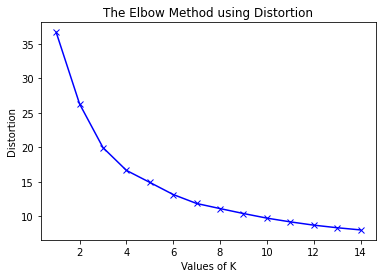

In [21]:
import matplotlib.pyplot as plt
plt.plot(k, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [22]:
import matplotlib.pyplot as plt
Sum_of_squared_distances = []
mapp={}
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)
    mapp[k]=km.inertia_
for key,val in mapp.items(): 
    print(str(key)+' : '+str(val)) 

1 : 10687156.4507688
2 : 5554306.6291463515
3 : 3360012.9238692014
4 : 2210058.536871868
5 : 1781650.7565938963
6 : 1407652.1295139021
7 : 1165866.6089834906
8 : 1026908.8713012655
9 : 904220.4439058218
10 : 792877.4885420185
11 : 699400.7693598018
12 : 625251.8984487422
13 : 579913.5599272876
14 : 537066.2703333905


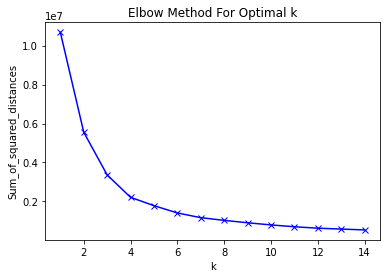

In [23]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

The elbow method is a technique to find the optimum number of clusters to fit for the data.
Here i will mention this amazing [blog post](http://https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/) by GeeksforGeeks which clearly explains Elbow method in detail along with code.

In [24]:
from sklearn.metrics import silhouette_score
try:
    for n_clusters in K:
        clusterer = KMeans (n_clusters=n_clusters).fit(data)
        preds = clusterer.predict(data)
        centers = clusterer.cluster_centers_

        score = silhouette_score (data, preds, metric='euclidean')
        print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
except Exception as e:
    print(e)

Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)


In [25]:
score_list=[]
for n_clusters in range(2,15):
        clusterer = KMeans (n_clusters=n_clusters).fit(data)
        preds = clusterer.predict(data)
        centers = clusterer.cluster_centers_

        score = silhouette_score (data, preds, metric='euclidean')
        score_list.append(score)
        print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4291682412065322)
For n_clusters = 3, silhouette score is 0.44034810630017973)
For n_clusters = 4, silhouette score is 0.46162586820317336)
For n_clusters = 5, silhouette score is 0.44744587542496395)
For n_clusters = 6, silhouette score is 0.42359346001719855)
For n_clusters = 7, silhouette score is 0.4287024305410248)
For n_clusters = 8, silhouette score is 0.429611389012972)
For n_clusters = 9, silhouette score is 0.423475442015739)
For n_clusters = 10, silhouette score is 0.4134239627879622)
For n_clusters = 11, silhouette score is 0.4136733207378566)
For n_clusters = 12, silhouette score is 0.4226770781999232)
For n_clusters = 13, silhouette score is 0.4125084872476257)
For n_clusters = 14, silhouette score is 0.4043896937730701)


This indicates 4 to be the best way to cluster.
Since at k=4 it shows the maximum silhouette score.

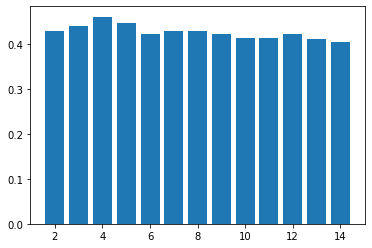

In [26]:
plt.bar(range(2,15),score_list)
plt.show()

In [27]:
model=KMeans(n_clusters=4)
model.fit(data)
print(model.labels_)

[1 2 1 ... 1 0 3]


These are th encoded labels corresponding to the  types of customers falling into the data. Using this information we can send out different business strategies or ads targeting them.